In [1]:
import requests 
import json
import pandas as pd
import csv

In [2]:
lat = "42.1670"
lon = "-76.8205"

genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/42.167,-76.8205',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-76.8205, 42.167]},
 'properties': {'@id': 'https://api.weather.gov/poi

In [3]:
forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)

    
json = new_request.json()
json



{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-76.8372978, 42.1819445],
    [-76.8412211, 42.1603681],
    [-76.812121, 42.1574591],
    [-76.80819170000001, 42.179035199999994],
    [-76.8372978, 42.1819445]]]},
 'properties': {'updated': '2023-03-21T02:21:30+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-21T02:40:55+00:00',
  'updateTime': '2023-03-21T02:21:30+00:00',
  'validTimes': '2023-03-20T20:00:00+00:00/P7DT17H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 274.0152},
  'periods': [{'number': 1,
    'name': 'Tonight',
    'startTime': '2023-03-20T22:00:00-04:00',
    'endTime': '2023-03-21T06:00:00-04:00',

In [4]:
a =json["properties"]["periods"]
a

[{'number': 1,
  'name': 'Tonight',
  'startTime': '2023-03-20T22:00:00-04:00',
  'endTime': '2023-03-21T06:00:00-04:00',
  'isDaytime': False,
  'temperature': 32,
  'temperatureUnit': 'F',
  'temperatureTrend': None,
  'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 20},
  'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': -6.666666666666667},
  'relativeHumidity': {'unitCode': 'wmoUnit:percent', 'value': 61},
  'windSpeed': '6 mph',
  'windDirection': 'S',
  'icon': 'https://api.weather.gov/icons/land/night/bkn/snow,20?size=medium',
  'shortForecast': 'Mostly Cloudy then Slight Chance Snow Showers',
  'detailedForecast': 'A slight chance of snow showers after 5am. Mostly cloudy, with a low around 32. South wind around 6 mph. Chance of precipitation is 20%.'},
 {'number': 2,
  'name': 'Tuesday',
  'startTime': '2023-03-21T06:00:00-04:00',
  'endTime': '2023-03-21T18:00:00-04:00',
  'isDaytime': True,
  'temperature': 56,
  'temperatureUnit': 'F',
  'temperatureT

In [5]:
csv_file = open("weather.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Day', 'Temperature', 'Forecast'])

for i in a:
    day = i["name"]
    temp = i["temperature"]
    detail = i["detailedForecast"]
    
    csv_writer.writerow([day, temp, detail])
    
csv_file.close()

sheet1 = pd.read_csv('weather.csv')
sheet1

,Day,Temperature,Forecast
0,Tonight,32,A slight chance of snow showers after 5am. Mos...
1,Tuesday,56,"Mostly sunny, with a high near 56. Southwest w..."
2,Tuesday Night,32,"Mostly cloudy, with a low around 32. South win..."
3,Wednesday,57,A slight chance of rain showers after 2pm. Mos...
4,Wednesday Night,44,"A chance of rain showers. Mostly cloudy, with ..."
5,Thursday,61,"Rain showers likely. Mostly cloudy, with a hig..."
6,Thursday Night,37,"Rain showers likely. Cloudy, with a low around..."
7,Friday,48,"A chance of rain showers. Mostly cloudy, with ..."
8,Friday Night,33,"A chance of rain before 11pm, then a chance of..."
9,Saturday,46,"A chance of snow before 7am, then rain and sno..."


In [6]:
from matplotlib import pyplot as plt
import numpy as np

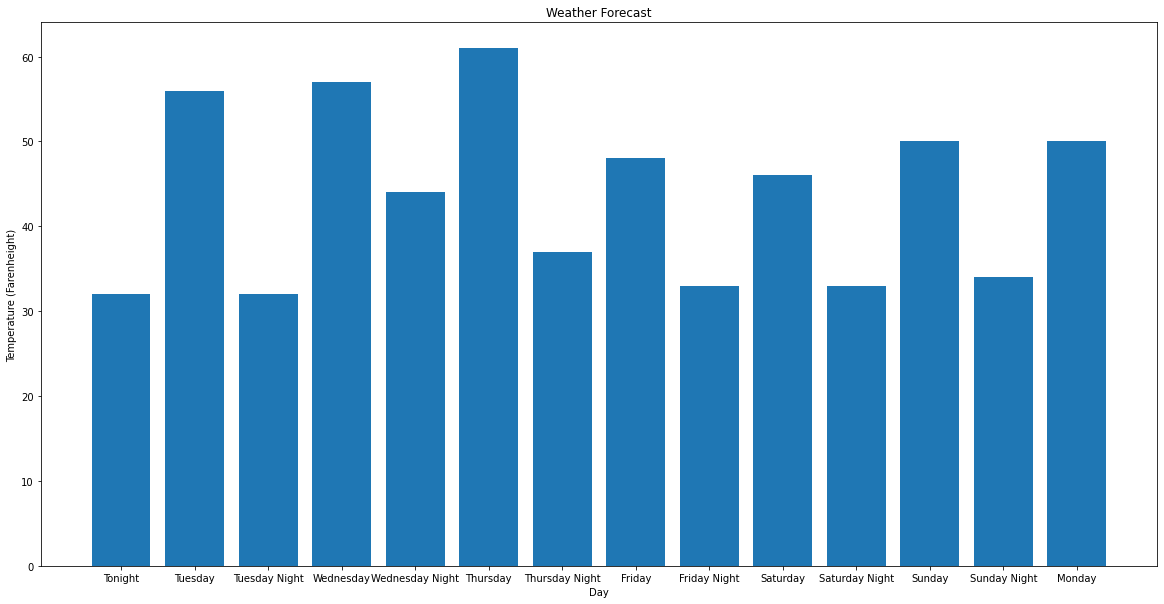

In [7]:
weather_df = pd.DataFrame(sheet1)

day = weather_df['Day']
temp = weather_df['Temperature']

fig = plt.figure(figsize=(20,10)) # In order to make the x labels not crowd each other I increased the width of the figure
plt.bar(day,temp)

plt.xlabel('Day')
plt.ylabel("Temperature (Farenheight)")
plt.title("Weather Forecast")

plt.show()

In [8]:
country_info = requests.get(f"https://date.nager.at/api/v3/CountryInfo/AF")
json_file2 = country_info.json()
json_file2
# This call gives a description of the country with code AF. The country common name is Afghanistan, the offical name is Islamic Republic of Afghanistan. The code is AF. The region is Asia. It borders many countries including Iran and Pakistan.

{'commonName': 'Afghanistan',
 'officialName': 'Islamic Republic of Afghanistan',
 'countryCode': 'AF',
 'region': 'Asia',
 'borders': [{'commonName': 'Iran',
   'officialName': 'Islamic Republic of Iran',
   'countryCode': 'IR',
   'region': 'Asia',
   'borders': None},
  {'commonName': 'Pakistan',
   'officialName': 'Islamic Republic of Pakistan',
   'countryCode': 'PK',
   'region': 'Asia',
   'borders': None},
  {'commonName': 'Turkmenistan',
   'officialName': 'Turkmenistan',
   'countryCode': 'TM',
   'region': 'Asia',
   'borders': None},
  {'commonName': 'Uzbekistan',
   'officialName': 'Republic of Uzbekistan',
   'countryCode': 'UZ',
   'region': 'Asia',
   'borders': None},
  {'commonName': 'Tajikistan',
   'officialName': 'Republic of Tajikistan',
   'countryCode': 'TJ',
   'region': 'Asia',
   'borders': None},
  {'commonName': 'China',
   'officialName': "People's Republic of China",
   'countryCode': 'CN',
   'region': 'Asia',
   'borders': None}]}

In [9]:
available_countries = requests.get(f"https://date.nager.at/api/v3/AvailableCountries")
json_file3 = available_countries.json()    
json_file3
# This calll gets all the countries that the API contains data on

[{'countryCode': 'AD', 'name': 'Andorra'},
 {'countryCode': 'AL', 'name': 'Albania'},
 {'countryCode': 'AR', 'name': 'Argentina'},
 {'countryCode': 'AT', 'name': 'Austria'},
 {'countryCode': 'AU', 'name': 'Australia'},
 {'countryCode': 'AX', 'name': 'Åland Islands'},
 {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'},
 {'countryCode': 'BB', 'name': 'Barbados'},
 {'countryCode': 'BE', 'name': 'Belgium'},
 {'countryCode': 'BG', 'name': 'Bulgaria'},
 {'countryCode': 'BJ', 'name': 'Benin'},
 {'countryCode': 'BO', 'name': 'Bolivia'},
 {'countryCode': 'BR', 'name': 'Brazil'},
 {'countryCode': 'BS', 'name': 'Bahamas'},
 {'countryCode': 'BW', 'name': 'Botswana'},
 {'countryCode': 'BY', 'name': 'Belarus'},
 {'countryCode': 'BZ', 'name': 'Belize'},
 {'countryCode': 'CA', 'name': 'Canada'},
 {'countryCode': 'CH', 'name': 'Switzerland'},
 {'countryCode': 'CL', 'name': 'Chile'},
 {'countryCode': 'CN', 'name': 'China'},
 {'countryCode': 'CO', 'name': 'Colombia'},
 {'countryCode': 'CR', 'name':

In [10]:
long_weekend = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2022/GR")
json_file4 = long_weekend.json()
json_file4

[{'date': '2022-01-01',
  'localName': 'Πρωτοχρονιά',
  'name': "New Year's Day",
  'countryCode': 'GR',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-01-06',
  'localName': 'Θεοφάνεια',
  'name': 'Epiphany',
  'countryCode': 'GR',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-03-07',
  'localName': 'Καθαρά Δευτέρα',
  'name': 'Clean Monday',
  'countryCode': 'GR',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-03-25',
  'localName': 'Ευαγγελισμός της Θεοτόκου',
  'name': 'Annunciation',
  'countryCode': 'GR',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-03-25',
  'localName': 'Εικοστή Πέμπτη Μαρτίου',
  'name': 'Independence Day',
  'countryCode': 'GR',
  'fixed': True,
  'global': True,
  'counties': Non

In [12]:
public_holidays = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2023/GR")
json_file5=public_holidays.json()
json_file5

[{'date': '2023-01-01',
  'localName': 'Πρωτοχρονιά',
  'name': "New Year's Day",
  'countryCode': 'GR',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-01-06',
  'localName': 'Θεοφάνεια',
  'name': 'Epiphany',
  'countryCode': 'GR',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-02-27',
  'localName': 'Καθαρά Δευτέρα',
  'name': 'Clean Monday',
  'countryCode': 'GR',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-25',
  'localName': 'Ευαγγελισμός της Θεοτόκου',
  'name': 'Annunciation',
  'countryCode': 'GR',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-25',
  'localName': 'Εικοστή Πέμπτη Μαρτίου',
  'name': 'Independence Day',
  'countryCode': 'GR',
  'fixed': True,
  'global': True,
  'counties': Non

In [21]:
istoday=requests.get(f"https://date.nager.at/api/v3/IsTodayPublicHoliday/GR")
if istoday == "[ $STATUSCODE -ne 200 ]":
    print('Holiday')
else:
    print('No Holiday')
    
# Checks to see if today is a public holiday in that country

No Holiday


In [39]:
next_365=requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/GR")
json_file6=next_365.json()
json_file6
# This gets the upcoing holidays in the country you specify

[{'date': '2023-03-25',
  'localName': 'Ευαγγελισμός της Θεοτόκου',
  'name': 'Annunciation',
  'countryCode': 'GR',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-25',
  'localName': 'Εικοστή Πέμπτη Μαρτίου',
  'name': 'Independence Day',
  'countryCode': 'GR',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-14',
  'localName': 'Μεγάλη Παρασκευή',
  'name': 'Good Friday',
  'countryCode': 'GR',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-16',
  'localName': 'Κυριακή του Πάσχα',
  'name': 'Easter Sunday',
  'countryCode': 'GR',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-17',
  'localName': 'Δευτέρα του Πάσχα',
  'name': 'Easter Monday',
  'countryCode': 'GR',
  'fixed': False,
  'global': Tr

In [24]:
next_holidays = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")
json_file6=next_holidays.json()
json_file6
# This gets closest holdays to today in the countries the api contains

[{'date': '2023-03-20',
  'localName': 'Día de San José',
  'name': "Saint Joseph's Day",
  'countryCode': 'CO',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'San José',
  'name': "St. Joseph's Day",
  'countryCode': 'ES',
  'fixed': True,
  'global': False,
  'counties': ['ES-MD'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Natalicio de Benito Juárez',
  'name': "Benito Juárez's birthday",
  'countryCode': 'MX',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Otago Anniversary Day',
  'name': 'Otago Anniversary Day',
  'countryCode': 'NZ',
  'fixed': False,
  'global': False,
  'counties': ['NZ-OTA'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'TN',

In [42]:
request = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2023/GR")
holidays=request.json()
holidays
x = []
for public_holiday in holidays:
    x.append(public_holiday['name'])
x

# Could not figure out a way to use 10 countries so I just had to use one

["New Year's Day",
 'Epiphany',
 'Clean Monday',
 'Annunciation',
 'Independence Day',
 'Good Friday',
 'Easter Sunday',
 'Easter Monday',
 'Labour Day',
 'Pentecost',
 'Whit Monday',
 'Assumption Day',
 'Ochi Day',
 'Christmas Day',
 "St. Stephen's Day"]

In [43]:
len(x)
# There are 15 holidays in a year in Greece

15